# Machine Learning Project M3

## Team:
Julian Frank 
<br>
Anna Roth

***

## Content:
1. Introduction and Data Exploration
2. Exploration of many different models
> 2.1 Lineare Regression<br>
> 2.2 Randomforest Regression<br>
> 2.3 Randomforest Classification<br>
> 2.4 Logistic Regression<br>
> 2.5 PCA

## 1. Introduction and Data Exploration

Libraries, Feature explanation, some data visualisation

### 1.1 Framing the problem

**What is being analyzed**: Develop the best model to predict wine quality.

**Frame the problem:** Wine quality is modeled under a regression approach that preserves the order of the grades. Explanatory knowledge is given by a sensitivity analysis, which measures how the responses are affected when a given input is varied through its domain.
</br>
regression, classification etc. *

*  Regression
*  Classification
*  Clustering

**Performance Measurement:** In general, meaningful variables are the MSE (Mean squared error) and the R-squared value. The lower the MSE, the better while the r-squared value improves when converging to 1. When these values are similar in the train set comparing to the ones in the test set, the model is probably good (-> no overfitting).

**Qualitative Approach:** Could be solved by just looking at one feature (e.g. "alcohol") and then sort the whole list of samples. Comparing the order of this list to order when sorted by the quality, we could estimate the influence of this feature. Furthermore, we could do this with every feature. Through this, we can gain insights into the dynamics of every feature and it is possible to weighten the features and calculate so that the quality can hopefully be reconstructed. 

**Quantitative Approach:** To gain a quantitative grasp about the relations, we could calculate the correlation of each feature with the quality. This gives the insight, which feature has the biggest influence on a quality. So the qualitative assumptions could be tested.

### 1.1 Data Description

To gain insights in the characteristics of the features is crucial. It lays the fundament when it comes to preparing the data (data cleaning, feature engineering, feature scaling, etc.) Therefore, we highlight the remarkable aspects and point out possible obstacles.

### Feature Description

**Input variables** (based on physicochemical tests):<br>
1 - Fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - Volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - Citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - Residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - Chlorides: the amount of salt in the wine

6 - Free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - Total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - Density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - Sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - Alcohol: the percent alcohol content of the wine

**Output variable** (based on sensory data):

12 - quality (score between 0 and 10)

### Data Description

Whithin our dataset we find analytical data about wine taste preferences. It is a large dataset with a total of 4898 samples. 

More precisely, this work will consider vinho verde, a unique product from the Minho (north- west) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer). This wine accounts for 15% of the total Portuguese production, and around 10% is exported, mostly white wine. The data were collected from May/2004 to February/2007 using only protected designation of origin samples that were tested at the offcial
certication entity.

### 1.3 Preparation
### Import Libraries

In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy as scp
from tqdm import tqdm
from google.colab import drive 
drive.mount('/content/drive',force_remount=True)
import os 
os.chdir("/content/drive/My Drive/CAS_ADS/M3")
!ls

# Scikit-learn 
import sklearn 
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from scipy.stats import entropy

# numeric library
import numpy as np

#Set path to your data here
path_a = "/content/drive/My Drive/CAS_ADS/M3"
#path julian
path = "/content/drive/My Drive/CAS/6_Projekt_M3/"

Mounted at /content/drive
 ML_Project_Julian_Anna_FinalVersion.ipynb   RedRedWine-vx.ipynb
 ML_Project_Julian_Anna.ipynb		    'Screenshot 2021-12-21 110549.jpg'
 RedRedWine.ipynb			     winequality-red.csv


### Define Functions

In [8]:
# calculates the feature importance
def rf_feature_importance(fitted_model, df):
    return pd.DataFrame(
        {"Column": df.columns, "Importance": fitted_model.feature_importances_}
    ).sort_values("Importance", ascending=False)

# plot the feature importance in a barplot
def plot_feature_importance(feature_importance):
    return sns.barplot(y="Column", x="Importance", data=feature_importance, color='b')

### 1.4 Data Visualisation

In [9]:
df = pd.read_csv(path_a +'/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.describe(include='all').round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


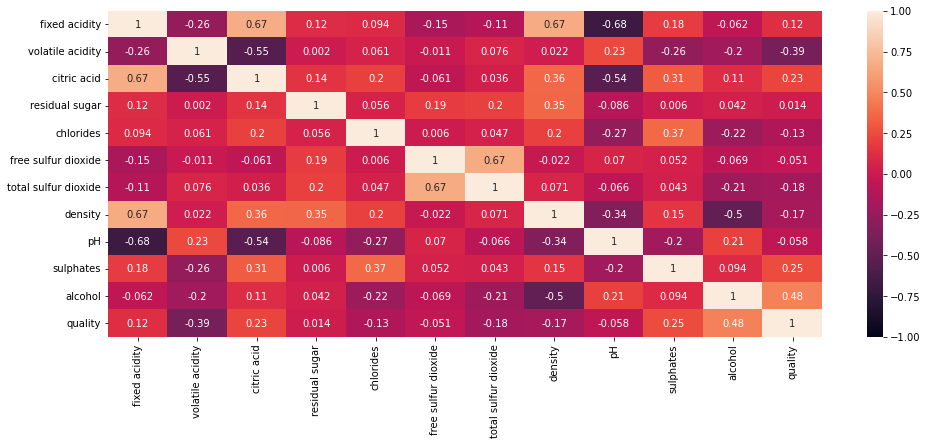

In [11]:
plt.figure(figsize=(16, 6))

sns.heatmap(df.corr().round(3), vmin=-1, vmax=1, annot=True);

Number of categories:  [5 6 7 4 8 3]


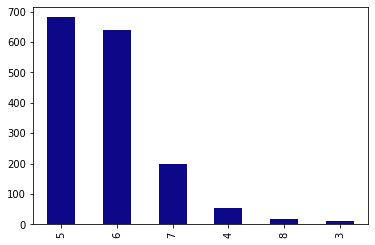

In [12]:
categories = df.quality.unique()
print('Number of categories: ', categories)
df.quality.value_counts().plot(kind='bar', cmap='plasma')

#### Meaning for models

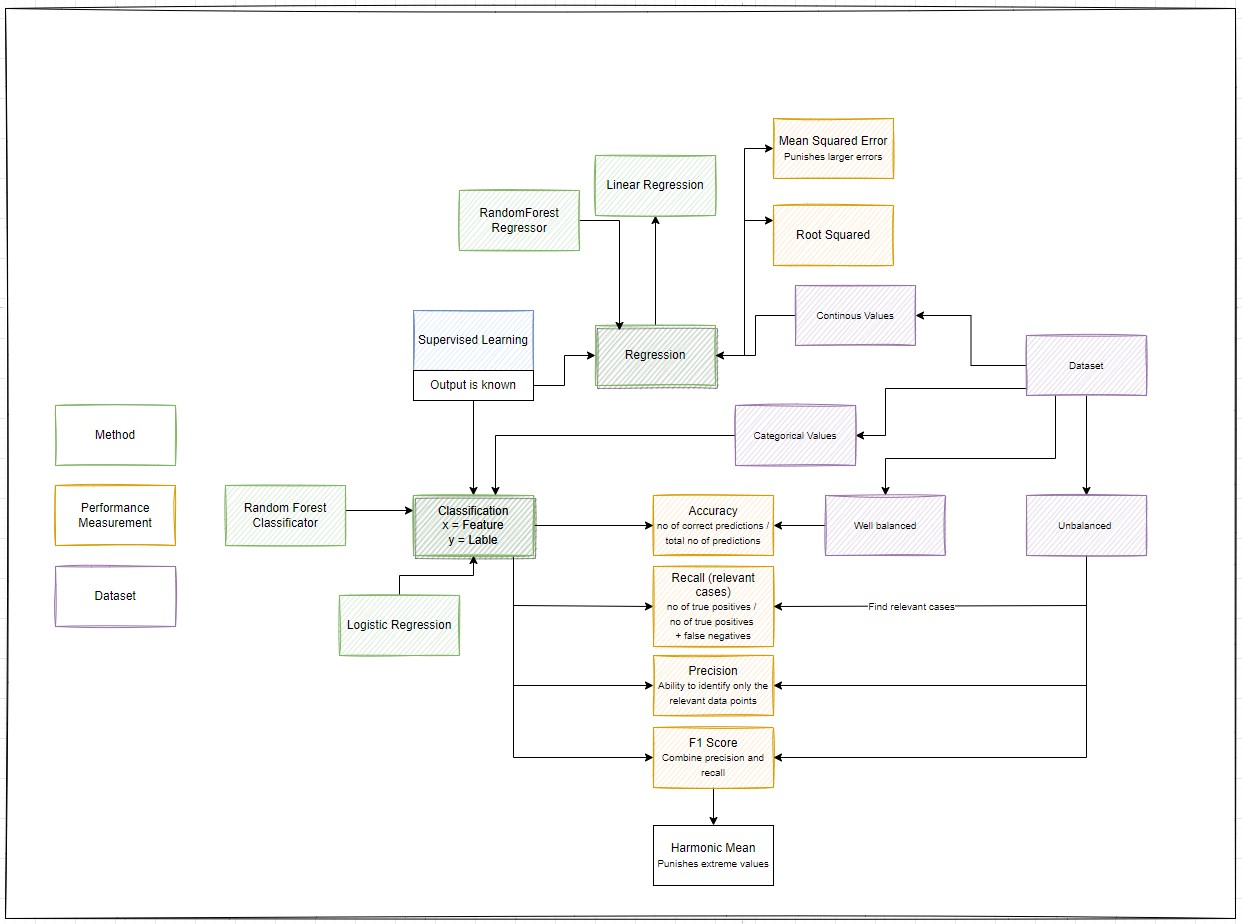

# 2. Exploration of different models

## Regression

### 2.1 Linear Regression

In [13]:
x = df.drop(columns=["quality"],axis=1)
y = df["quality"]

# Make train/test split
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.2, random_state=42)
print("Size of Datasets:\n\nSet\tRows\nTrain\t"f'{len(x_train_reg)} \nTest\t{len(x_test_reg)}')

# Fit the model
reg = linear_model.LinearRegression()
reg.fit(x_train_reg, y_train_reg)

Size of Datasets:

Set	Rows
Train	1279 
Test	320


LinearRegression()

train mse = 0.4242
test mse = 0.39
train R2 = 0.348
test R2 = 0.4032


[]

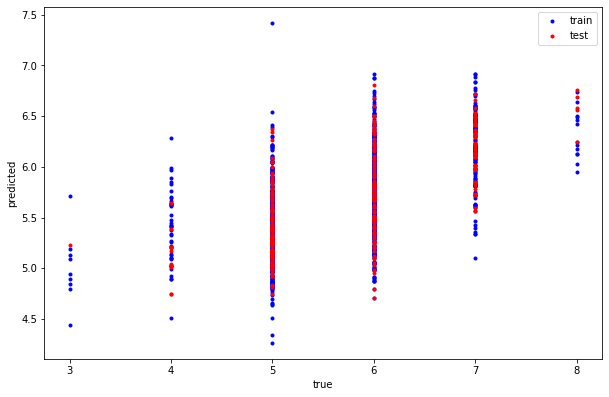

In [14]:
# Prediction:
y_p_train_reg = reg.predict(x_train_reg)
y_p_test_reg = reg.predict(x_test_reg)

# Evaluate MSE and R2 on train and test datasets
# MSE
train_mse_reg = mean_squared_error(y_train_reg, y_p_train_reg)
test_mse_reg = mean_squared_error(y_test_reg, y_p_test_reg)

print('train mse =', train_mse_reg.round(4))
print('test mse =', test_mse_reg.round(4))

# R2
train_r2_reg = reg.score(x_train_reg, y_train_reg)
test_r2_reg = reg.score(x_test_reg, y_test_reg)
print('train R2 =', train_r2_reg.round(4))
print('test R2 =', test_r2_reg.round(4))

# Plot y vs predicted y for test and train parts
plt.figure(figsize=(10,10))
plt.plot(y_train_reg, y_p_train_reg, 'b.', label='train')
plt.plot(y_test_reg, y_p_test_reg, 'r.', label='test')

plt.plot([], [], 'w.')  
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.legend()
plt.plot()

In [15]:
# Let's see the difference between the Actual Values and the Predicted values!
pred_y_reg = pd.DataFrame({'Actual Values':y_train_reg, 'Predicted value':y_p_train_reg, 'Difference':y_train_reg-y_p_train_reg})
pred_y_reg[0:15]

,Actual Values,Predicted value,Difference
493,6,5.688644,0.311356
354,6,6.056649,-0.056649
342,6,5.692697,0.307303
834,5,5.111646,-0.111646
705,5,4.799071,0.200929
522,5,5.635679,-0.635679
1590,6,6.192227,-0.192227
1404,6,5.604362,0.395638
1055,6,4.983648,1.016352
277,6,6.169873,-0.169873


In [16]:
squaredErrors = pred_y_reg['Difference'] * pred_y_reg['Difference']
 
# Mean deviation -> MSE
deviation_reg = squaredErrors.mean()
deviation_reg

0.42419115731399054

### 2.2 Randomforest Regression

In [17]:
# Make train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

'''print("Size of Datasets:\n\nSet\tRows\nTrain\t"f'{len(x_train)} \nTest\t{len(x_test)}')'''

# Fit the model
rfr = RandomForestRegressor(n_estimators=200, max_depth=16, min_samples_leaf=10, n_jobs=-1, random_state=42)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=16, min_samples_leaf=10, n_estimators=200,
                      n_jobs=-1, random_state=42)

Train MSE = 0.2436
Test MSE = 0.3412
Train R2 = 0.6255
Test R2 = 0.4779


[]

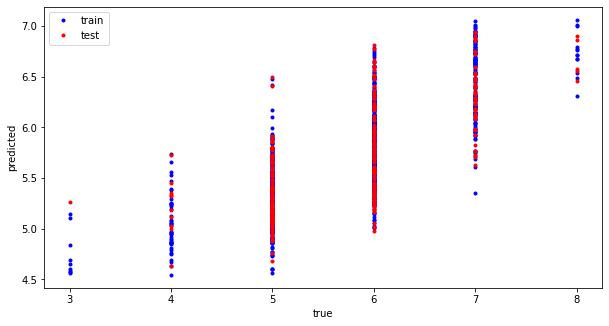

In [18]:
# Prediction:
y_p_train_rfr = rfr.predict(x_train)
y_p_test_rfr = rfr.predict(x_test)

# evaluate MSE and R2 on train and test datasets
# MSE
train_mse_rfr = mean_squared_error(y_train, y_p_train_rfr)
test_mse_rfr = mean_squared_error(y_test, y_p_test_rfr)

print('Train MSE =', train_mse_rfr.round(4))
print('Test MSE =', test_mse_rfr.round(4))

# R-squared scores
test_r2_rfr = r2_score(y_test.values.ravel(), y_p_test_rfr)
train_r2_rfr = r2_score(y_train.values.ravel(), y_p_train_rfr)

print('Train R2 =', train_r2_rfr.round(4))
print('Test R2 =', test_r2_rfr.round(4))

# Plot y vs predicted y for test and train parts
plt.figure(figsize=(10,10))
plt.plot(y_train, y_p_train_rfr, 'b.', label='train')
plt.plot(y_test, y_p_test_rfr, 'r.', label='test')

plt.plot([], [], 'w.')  # dummy to have origin
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.legend()
plt.plot()

In [19]:
# Let's see the difference between the Actual Values and the Predicted values!
pred_y_rfr = pd.DataFrame({'Actual Values':y_train, 'Predicted value':y_p_train_rfr, 'Difference':y_train-y_p_train_rfr})
pred_y_rfr[0:15]

,Actual Values,Predicted value,Difference
493,6,6.191209,-0.191209
354,6,6.273626,-0.273626
342,6,5.869746,0.130254
834,5,4.948884,0.051116
705,5,4.811485,0.188515
522,5,5.241425,-0.241425
1590,6,6.348562,-0.348562
1404,6,5.829018,0.170982
1055,6,5.304581,0.695419
277,6,6.073743,-0.073743


In [20]:
sqdErrors = pred_y_rfr['Difference'] * pred_y_rfr['Difference']
 
# Mean deviation -> MSE
deviation_rfr = sqdErrors.mean()
deviation_rfr

0.24362903196151714

In [21]:
# Feature Importance
rfr.feature_importances_

array([0.03453919, 0.11559784, 0.03404551, 0.02059685, 0.03941211,
       0.02813704, 0.0682245 , 0.03028034, 0.0426644 , 0.19837134,
       0.38813088])

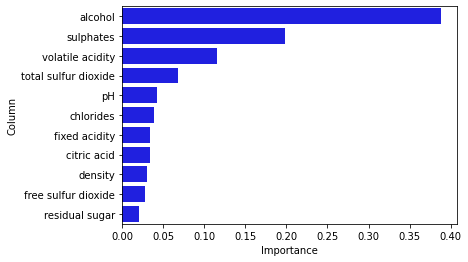

In [22]:
feature_importance = rf_feature_importance(rfr, x)
plot_feature_importance(feature_importance);

In [23]:
# Define threshold-value for feature importance and just keep the features with a higher index / score
feature_importance_threshold = 0.03
cols_to_keep = feature_importance[
    feature_importance['Importance'] > feature_importance_threshold
]['Column']

len(cols_to_keep)

9

In [24]:
cols_to_keep

10                 alcohol
9                sulphates
1         volatile acidity
6     total sulfur dioxide
8                       pH
4                chlorides
0            fixed acidity
2              citric acid
7                  density
Name: Column, dtype: object

In [25]:
# create a copy of the data with selected columns and create new train / test set
x_keep = x.copy()[cols_to_keep]
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(x_keep, y, test_size=0.2, random_state=42)

print(f'{len(x_train_k)} train rows + {len(x_test_k)} test rows')

x = x_keep
y = df["quality"]

1279 train rows + 320 test rows


In [26]:
# create a new model to see if the dropped columns have a influence on the score
rfr_k = RandomForestRegressor(n_estimators=200, max_depth=16, min_samples_leaf=10, n_jobs=-1, random_state=42)
rfr_k.fit(x_train_k, y_train_k)

RandomForestRegressor(max_depth=16, min_samples_leaf=10, n_estimators=200,
                      n_jobs=-1, random_state=42)

Train MSE = 0.2478
Test MSE = 0.3448
Train R2 = 0.6191
Test R2 = 0.4724


[]

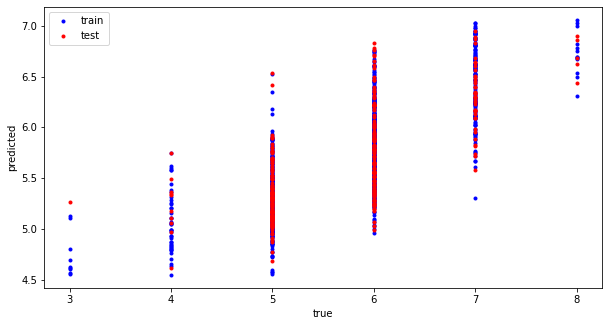

In [27]:
# Prediction:
y_p_train_rfr_nf = rfr_k.predict(x_train_k)
y_p_test_rfr_nf = rfr_k.predict(x_test_k)

# Evaluate MSE and R2 on train and test datasets
# MSE
train_mse_rfr_nf = mean_squared_error(y_train_k, y_p_train_rfr_nf)
test_mse_rfr_nf = mean_squared_error(y_test_k, y_p_test_rfr_nf)

print('Train MSE =', train_mse_rfr_nf.round(4))
print('Test MSE =', test_mse_rfr_nf.round(4))

# R-squared scores
test_r2_rfr_nf = r2_score(y_test_k.values.ravel(), y_p_test_rfr_nf)
train_r2_rfr_nf = r2_score(y_train_k.values.ravel(), y_p_train_rfr_nf)

print('Train R2 =', train_r2_rfr_nf.round(4))
print('Test R2 =', test_r2_rfr_nf.round(4))

# Plot y vs predicted y for test and train parts
plt.figure(figsize=(10,10))
plt.plot(y_train, y_p_train_rfr_nf, 'b.', label='train')
plt.plot(y_test, y_p_test_rfr_nf, 'r.', label='test')

plt.plot([], [], 'w.')  # dummy to have origin
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.legend()
plt.plot()

## Fazit Regression

In [28]:
scores = ['Train MSE', 'Test MSE', 'Train R2', 'Test R2']
LinerRegression = pd.Series([train_mse_reg, test_mse_reg, train_r2_reg, test_r2_reg], index = scores)
RandomForestRegressor = pd.Series([train_mse_rfr, test_mse_rfr, train_r2_rfr, test_r2_rfr], index = scores)
RandomForestNewFeatures = pd.Series([train_mse_rfr_nf, test_mse_rfr_nf, train_r2_rfr_nf, test_r2_rfr_nf], index = scores)

scores_df = pd.concat({'LinearRegression':LinerRegression, 'RandomForestRegressor': RandomForestRegressor, 'RandomForestFeatmport':RandomForestNewFeatures}, axis=1)
print(scores_df)

           LinearRegression  RandomForestRegressor  RandomForestFeatmport
Train MSE          0.424191               0.243629               0.247811
Test MSE           0.390025               0.341199               0.344807
Train R2           0.347993               0.625527               0.619099
Test R2            0.403180               0.477894               0.472374


## Classification

### 2.3 Randomforest Classification 

In [29]:
x = df.drop(columns=["quality"],axis=1)
y = df["quality"]

# Make train/test split
x_train_rfc, x_test_rfc, y_train_rfc, y_test_rfc = train_test_split(x, y, test_size=0.2, random_state=42) 

'''print("Size of Datasets:\n\nSet\tRows\nTrain\t"f'{len(x_train)} \nTest\t{len(x_test)}')'''

# Fit the model
rfc = RandomForestClassifier(n_estimators=200, max_depth=16, min_samples_leaf=10, n_jobs=-1, random_state=42)
rfc.fit(x_train_rfc, y_train_rfc)

RandomForestClassifier(max_depth=16, min_samples_leaf=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [30]:
# Prediction:
y_p_train_rfc = rfc.predict(x_train_rfc)
y_p_test_rfc = rfc.predict(x_test_rfc)

print("ConfusionMatrix Train")
matrix_rfc = np.array(confusion_matrix(y_train_rfc, y_p_train_rfc))
pd.DataFrame(matrix_rfc)

ConfusionMatrix Train


,0,1,2,3,4,5
0,0,0,7,2,0,0
1,0,0,30,13,0,0
2,0,0,483,66,2,0
3,0,0,83,416,7,0
4,0,0,8,74,75,0
5,0,0,0,11,2,0


In [31]:
print("ConfusionMatrix Test")
matrix_rfc1 = np.array(confusion_matrix(y_test_rfc, y_p_test_rfc))
pd.DataFrame(matrix_rfc1)

ConfusionMatrix Test


,0,1,2,3,4,5
0,0,0,1,0,0,0
1,0,0,7,3,0,0
2,0,0,101,29,0,0
3,0,0,38,88,6,0
4,0,0,0,34,8,0
5,0,0,0,4,1,0


Train Precision =  0.7615
Test Precision = 0.6156
Train Recall =  0.3627
Test Recall = 0.2723
Train Accuracy = 0.7615
Test Accuracy = 0.6156
Train F1 = 0.3689
Test F1 = 0.2695


[]

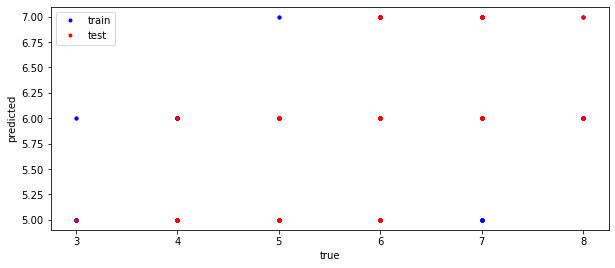

In [32]:
# Evaluate Precision, Recall, Accuracy and F1 on train and test datasets

# Precision
train_prec_rfc = precision_score(y_train_rfc, y_p_train_rfc, average='micro')
test_prec_rfc = precision_score(y_test_rfc, y_p_test_rfc, average='micro')

print('Train Precision = ', train_prec_rfc.round(4))
print('Test Precision =', test_prec_rfc.round(4))

# Recall
train_rec_rfc = recall_score(y_train_rfc, y_p_train_rfc, average='macro')
test_rec_rfc = recall_score(y_test_rfc, y_p_test_rfc, average='macro')

print('Train Recall = ', train_rec_rfc.round(4))
print('Test Recall =', test_rec_rfc.round(4))

# Accuracy
train_acc_rfc = accuracy_score(y_train_rfc, y_p_train_rfc)
test_acc_rfc = accuracy_score(y_test_rfc, y_p_test_rfc)

print('Train Accuracy =', train_acc_rfc.round(4))
print('Test Accuracy =', test_acc_rfc.round(4))

# F1
train_f1_rfc = f1_score(y_train_rfc, y_p_train_rfc, average='macro')
test_f1_rfc = f1_score(y_test_rfc, y_p_test_rfc, average='macro')

print('Train F1 =', train_f1_rfc.round(4))
print('Test F1 =', test_f1_rfc.round(4))

# Plot y vs predicted y for test and train parts
plt.figure(figsize=(10,10))
plt.plot(y_train, y_p_train_rfc, 'b.', label='train')
plt.plot(y_test, y_p_test_rfc, 'r.', label='test')

plt.plot([], [], 'w.')  # dummy to have origin
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.legend()
plt.plot()

In [33]:
my_array = y_p_train_rfc
np.set_printoptions(threshold=np.inf)
print(my_array)

[6 6 6 5 5 5 6 6 5 6 6 7 5 6 6 6 6 6 5 5 6 7 5 5 6 5 6 5 6 5 5 6 5 5 6 6 5
 5 5 5 6 5 5 6 5 6 6 5 5 5 5 5 6 5 6 6 6 6 5 5 5 6 6 6 6 6 6 5 5 6 5 5 5 6
 6 6 6 5 5 6 5 5 6 5 6 6 7 6 5 5 6 7 6 6 5 6 6 7 5 7 6 5 6 5 6 5 5 5 6 5 7
 6 5 5 7 5 5 5 5 6 6 6 6 5 6 5 5 5 6 5 6 6 6 5 6 6 7 5 6 5 5 6 5 5 6 5 6 5
 5 6 7 6 6 6 5 6 6 6 6 5 6 6 6 6 5 6 6 6 5 5 6 5 5 5 6 5 6 5 5 5 5 6 5 5 6
 5 6 6 7 6 6 7 5 5 5 6 6 6 6 5 6 5 6 6 7 7 5 5 6 6 5 6 5 6 6 5 5 5 5 6 5 5
 6 5 6 6 5 5 6 5 6 5 5 5 6 6 5 6 6 7 5 5 6 5 5 5 6 5 5 6 6 5 6 6 6 5 5 6 5
 5 5 5 5 7 5 7 6 5 6 5 6 5 5 5 5 6 6 5 5 6 5 5 6 6 5 6 6 5 6 6 6 6 5 7 7 5
 6 6 5 6 5 5 5 6 5 6 5 6 5 5 6 5 5 5 6 5 5 5 5 6 6 5 5 5 5 6 5 6 7 5 7 6 6
 5 5 7 5 7 6 6 6 6 5 7 5 5 5 6 5 5 5 5 5 6 6 5 7 6 7 5 6 5 5 5 6 5 6 6 6 6
 5 7 5 6 5 5 5 5 7 6 6 5 5 6 6 6 6 5 5 6 6 5 5 7 5 6 5 5 6 6 6 6 5 5 6 7 6
 7 5 6 5 5 5 5 5 5 5 5 6 6 5 6 5 6 5 6 6 5 5 5 5 7 5 6 5 5 6 6 5 5 5 5 5 5
 5 5 6 5 5 6 5 6 5 5 6 5 5 5 6 6 5 6 6 6 5 6 5 7 5 5 6 5 6 6 6 5 5 6 5 6 5
 5 5 6 5 5 5 5 6 5 5 6 6 

In [34]:
# Feature Importance
rfc.feature_importances_

array([0.05709172, 0.10753021, 0.0561744 , 0.0453391 , 0.05866887,
       0.04603091, 0.11362361, 0.08599803, 0.04891698, 0.13948742,
       0.24113874])

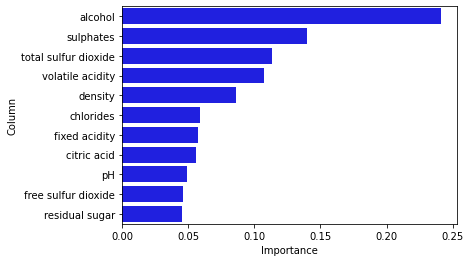

In [35]:
feature_importance = rf_feature_importance(rfc, x)
plot_feature_importance(feature_importance);

In [36]:
# define threshold-value for feature importance and just keep the features with a higher index / score
feature_importance_threshold = 0.048
cols_to_keep2 = feature_importance[
    feature_importance['Importance'] > feature_importance_threshold
]['Column']

len(cols_to_keep2)

9

In [37]:
cols_to_keep2

10                 alcohol
9                sulphates
6     total sulfur dioxide
1         volatile acidity
7                  density
4                chlorides
0            fixed acidity
2              citric acid
8                       pH
Name: Column, dtype: object

In [38]:
# create a copy of the data with selected columns and create new train / test set
x_keep2 = x.copy()[cols_to_keep2]
x = x_keep2
y = df["quality"]

x_train_k2, x_test_k2, y_train_k2, y_test_k2 = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'{len(x_train_k2)} train rows + {len(x_test_k2)} test rows')

1279 train rows + 320 test rows


In [39]:
# create a new model to see if the dropped columns have a influence on the score
rfc_k2 = RandomForestClassifier(n_estimators=200, max_depth=16, min_samples_leaf=10, n_jobs=-1, random_state=42)
rfc_k2.fit(x_train_k2, y_train_k2)

RandomForestClassifier(max_depth=16, min_samples_leaf=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [40]:
#prediction:
y_p_train_rfc_nf = rfc_k2.predict(x_train_k2)
y_p_test_rfc_nf = rfc_k2.predict(x_test_k2)

In [41]:
# Evaluate Precision, Recall, Accuracy and F1 on train and test datasets

# Precision
train_prec_rfc_nf = precision_score(y_train_k2, y_p_train_rfc_nf, average='micro')
test_prec_rfc_nf = precision_score(y_test_k2, y_p_test_rfc_nf, average='micro')

print('Train Precision = ', train_prec_rfc_nf.round(4))
print('Test Precision =', test_prec_rfc_nf.round(4))

# Recall
train_rec_rfc_nf = recall_score(y_train_k2, y_p_train_rfc_nf, average='macro')
test_rec_rfc_nf = recall_score(y_test_k2, y_p_test_rfc_nf, average='macro')

print('Train Recall = ', train_rec_rfc_nf.round(4))
print('Test Recall =', test_rec_rfc_nf.round(4))

# Accuracy
train_acc_rfc_nf = accuracy_score(y_train_k2, y_p_train_rfc_nf)
test_acc_rfc_nf = accuracy_score(y_test_k2, y_p_test_rfc_nf)

print('Train Accuracy =', train_acc_rfc_nf.round(4))
print('Test Accuracy =', test_acc_rfc_nf.round(4))

# F1
train_f1_rfc_nf = f1_score(y_train_k2, y_p_train_rfc_nf, average='macro')
test_f1_rfc_nf = f1_score(y_test_k2, y_p_test_rfc_nf, average='macro')

print('Train F1 =', train_f1_rfc_nf.round(4))
print('Test F1 =', test_f1_rfc_nf.round(4))


Train Precision =  0.76
Test Precision = 0.5969
Train Recall =  0.362
Test Recall = 0.2728
Train Accuracy = 0.76
Test Accuracy = 0.5969
Train F1 = 0.3673
Test F1 = 0.2731


### 2.4 Logistic Regression

In [42]:
x = df.drop(columns=["quality"],axis=1)
y = df["quality"]

# Make train/test split
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x, y, test_size=0.2, random_state=42) 

# Fit the model
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(x_train_lr, y_train_lr)

# Prediction:
y_p_train_lr = lr.predict(x_train_lr)
y_p_test_lr = lr.predict(x_test_lr)

print("ConfusionMatrix Train")
matrix = np.array(confusion_matrix(y_train_lr, y_p_train_lr))
pd.DataFrame(matrix)

ConfusionMatrix Train


,0,1,2,3,4,5
0,0,0,8,1,0,0
1,0,0,27,15,1,0
2,0,0,428,122,1,0
3,0,0,184,315,7,0
4,0,0,12,130,15,0
5,0,0,0,10,3,0


In [43]:
print("ConfusionMatrix Test")
confmtrx = np.array(confusion_matrix(y_test_lr, y_p_test_lr))
pd.DataFrame(confmtrx)

ConfusionMatrix Test


,0,1,2,3,4,5
0,0,0,1,0,0,0
1,0,0,10,0,0,0
2,0,0,98,32,0,0
3,0,0,48,82,2,0
4,0,0,3,37,2,0
5,0,0,0,3,2,0


In [44]:
# Evaluate Precision, Recall, Accuracy and F1 on train and test datasets

# Precision
train_prec_lr = precision_score(y_train_lr, y_p_train_lr, average='micro')
test_prec_lr = precision_score(y_test_lr, y_p_test_lr, average='micro')

print('Train Precision = ', train_prec_lr.round(4))
print('Test Precision =', test_prec_lr.round(4))

# Recall
train_rec_lr = recall_score(y_train_lr, y_p_train_lr, average='macro')
test_rec_lr = recall_score(y_test_lr, y_p_test_lr, average='macro')

print('Train Recall = ', train_rec_lr.round(4))
print('Test Recall =', test_rec_lr.round(4))

# Accuracy
train_acc_lr = accuracy_score(y_train_lr, y_p_train_lr)
test_acc_lr = accuracy_score(y_test_lr, y_p_test_lr)

print('Train Accuracy =', train_acc_lr.round(4))
print('Test Accuracy =', test_acc_lr.round(4))

# F1
train_f1_lr = f1_score(y_train_lr, y_p_train_lr, average='macro')
test_f1_lr = f1_score(y_test_lr, y_p_test_lr, average='macro')

print('Train F1 =', train_f1_lr.round(4))
print('Test F1 =', test_f1_lr.round(4))

Train Precision =  0.5927
Test Precision = 0.5688
Train Recall =  0.2491
Test Recall = 0.2371
Train Accuracy = 0.5927
Test Accuracy = 0.5688
Train F1 = 0.2406
Test F1 = 0.2221


## Fazit Classification

In [45]:
scores = ['Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1']
RandomForestClassifier = pd.Series([train_prec_rfc, test_prec_rfc, train_rec_rfc, test_rec_rfc, train_acc_rfc, test_acc_rfc, train_f1_rfc, test_f1_rfc], index = scores)
RandomForestClassifierNF = pd.Series([train_prec_rfc_nf, test_prec_rfc_nf, train_rec_rfc_nf, test_rec_rfc_nf, train_acc_rfc_nf, test_acc_rfc_nf, train_f1_rfc_nf, test_f1_rfc_nf], index = scores)
LogisticRegression = pd.Series([train_prec_lr, test_prec_lr, train_rec_lr, test_rec_lr, train_acc_lr, test_acc_lr, train_f1_lr, test_f1_lr], index = scores)

scores_df = pd.concat({'RandomForestCla': RandomForestClassifier, 'RandomForestClaFeaImp' : RandomForestClassifierNF, 'LogisticRegression': LogisticRegression}, axis=1)
print(scores_df)

                 RandomForestCla  RandomForestClaFeaImp  LogisticRegression
Train Precision         0.761532               0.759969            0.592651
Test Precision          0.615625               0.596875            0.568750
Train Recall            0.362738               0.362026            0.249140
Test Recall             0.272344               0.272788            0.237113
Train Accuracy          0.761532               0.759969            0.592651
Test Accuracy           0.615625               0.596875            0.568750
Train F1                0.368886               0.367320            0.240622
Test F1                 0.269473               0.273064            0.222104


## Evaluation and model optimization

In [46]:
from sklearn.ensemble import RandomForestRegressor
# n_estimators
train_mse_est = []
test_mse_est = []

n_estimators = [5, 25, 50, 100, 200]
for n in tqdm(n_estimators):
  rfr = RandomForestRegressor(n_estimators=n, n_jobs=-1, random_state=42)

  results = cross_validate(rfr, x, y,
                            cv=5,
                            return_train_score = True,
                            scoring='neg_mean_squared_error')

  # we average the scores and append them to the list
  train_mse_est.append(-np.mean(results['train_score']))
  test_mse_est.append(-np.mean(results['test_score']))


print(train_mse_est)
print(test_mse_est)

100%|██████████| 5/5 [00:27<00:00,  5.56s/it]

[0.08140117767787337, 0.0515681213838937, 0.0478241470387021, 0.045664010261923384, 0.04379515255754007]
[0.5109579937304074, 0.4368718056426332, 0.43009223746081504, 0.4274034386755486, 0.4265737166438089]


In [47]:
best_estimators = n_estimators[np.argmin(train_mse_est)]
best_estimators

200

In [48]:
# max_depths
train_mse_dep = []
test_mse_dep = []

max_depths = [1, 2, 4, 8, 16, 32, 64]
for d in tqdm(max_depths):
    rfr = RandomForestRegressor(n_estimators=200, max_depth=d, n_jobs=-1, random_state=42)
    results = cross_validate(rfr, x, y,
                             cv=5,
                             return_train_score=True,
                             scoring='neg_mean_squared_error')
    
    # we average the scores and append them to the list
    train_mse_dep.append(-np.mean(results['train_score']))
    test_mse_dep.append(-np.mean(results['test_score']))

100%|██████████| 7/7 [00:42<00:00,  6.07s/it]


In [49]:
best_depth = max_depths[np.argmin(train_mse_dep)]
best_depth

32

In [50]:
# min_samples_leaf
train_mse_leaf = []
test_mse_leaf = []

min_samples_leaf = [1, 3, 5, 10, 25]
for s in tqdm(min_samples_leaf):
    rfr = RandomForestRegressor(n_estimators=200, max_depth=32, min_samples_leaf=s, n_jobs=-1, random_state=42)
    results = cross_validate(rfr, x, y,
                             cv=5,
                             return_train_score=True,
                             scoring='neg_mean_squared_error')
    
    # we average the scores and append them to the list
    train_mse_leaf.append(-np.mean(results['train_score']))
    test_mse_leaf.append(-np.mean(results['test_score']))

100%|██████████| 5/5 [00:43<00:00,  8.79s/it]


In [51]:
min_samples_leaf = min_samples_leaf[np.argmin(train_mse_leaf)]
min_samples_leaf

1

In [52]:
# Make train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model
rfr_corr = RandomForestRegressor(n_estimators=200, max_depth=32, min_samples_leaf=1, max_features='sqrt', n_jobs=-1, oob_score=True, random_state=42)
rfr_corr.fit(x_train, y_train)

# Prediction:
y_p_train_corr = rfr_corr.predict(x_train)
y_p_test_corr = rfr_corr.predict(x_test)

# evaluate MSE and R2 on train and test datasets
# MSE
train_mse_corr = mean_squared_error(y_train, y_p_train_corr)
test_mse_corr = mean_squared_error(y_test, y_p_test_corr)

print('Train MSE =', train_mse_corr.round(4))
print('Test MSE =', test_mse_corr.round(4))

# R-squared scores
test_r2_corr = r2_score(y_test.values.ravel(), y_p_test_corr)
train_r2_corr = r2_score(y_train.values.ravel(), y_p_train_corr)

print('Train R2 =', train_r2_corr.round(4))
print('Test R2 =', test_r2_corr.round(4))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Train MSE = 0.0468
Test MSE = 0.2922
Train R2 = 0.9281
Test R2 = 0.5528


In [53]:
scores = ['Train MSE', 'Test MSE', 'Train R2', 'Test R2']
RandomForestRegressor= pd.Series([train_mse_rfr, test_mse_rfr, train_r2_rfr, test_r2_rfr], index = scores)
RandomForestRegressor_corr = pd.Series([train_mse_corr, test_mse_corr, train_r2_corr, test_r2_corr], index = scores)

scores_corr = pd.concat({'RandomForestRegressor': RandomForestRegressor, 'RandomForestRegressor_Optimized' : RandomForestRegressor_corr}, axis=1)
print(scores_corr)

           RandomForestRegressor  RandomForestRegressor_Optimized
Train MSE               0.243629                         0.046800
Test MSE                0.341199                         0.292239
Train R2                0.625527                         0.928066
Test R2                 0.477894                         0.552813


## 2.5 PCA

In [65]:
#Standardize the data
scaler = preprocessing.StandardScaler().fit(x)
X_standardized = scaler.transform(x)

#PCA
pca=PCA()
pca.fit(X_standardized)

PCA()

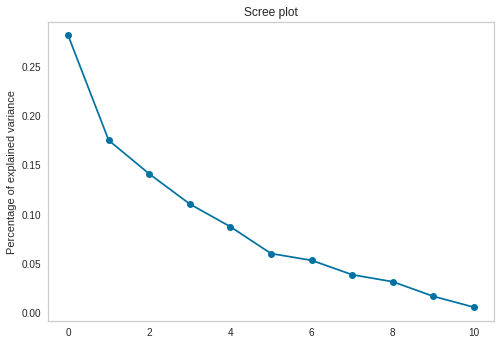

1.0


In [66]:
#Check the scree plot
plt.plot(pca.explained_variance_ratio_,'-o')
plt.title('Scree plot')
plt.ylabel('Percentage of explained variance')
plt.grid()
plt.show()
print(pca.explained_variance_ratio_.sum())

In [55]:
#Do PCA with 6 components
pca=PCA(n_components=6)
X_PCA = pd.DataFrame(pca.fit_transform(X_standardized), columns=["PC1", "PC2","PC3","PC4","PC5","PC6"])

In [56]:
#Show correlation matrix between PCs and Variables
dataframes = [df, X_PCA]
merged_data=pd.concat(dataframes,axis=1)
corr=merged_data.corr()
pd.options.display.float_format = '{:,.1f}'.format
corr[["PC1", "PC2","PC3","PC4","PC5", "PC6"]].iloc[0:11]
#PC1: acid
#PC2: sulfur?
#PC3: alcohol
#PC4: chlorides / sulphates
#PC5: sugar
#PC6: ??

,PC1,PC2,PC3,PC4,PC5,PC6
fixed acidity,0.9,-0.2,-0.2,-0.3,-0.1,0.1
volatile acidity,-0.4,0.4,-0.6,0.1,0.2,0.3
citric acid,0.8,-0.2,0.3,-0.1,-0.1,0.1
residual sugar,0.3,0.4,0.1,-0.4,0.7,0.0
chlorides,0.4,0.2,-0.1,0.7,0.2,0.2
free sulfur dioxide,-0.1,0.7,0.5,-0.0,-0.2,-0.0
total sulfur dioxide,0.0,0.8,0.4,-0.0,-0.2,0.1
density,0.7,0.3,-0.4,-0.2,0.2,-0.3
pH,-0.8,0.0,0.1,-0.0,0.3,-0.4
sulphates,0.4,-0.1,0.3,0.6,0.2,-0.3


In [57]:
#Compare prediction based on PCA to the classification forest above
pca_class_forest = ensemble.RandomForestClassifier(max_depth=30, n_estimators=500)
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=44)
pca_class_forest.fit(pca_x_train, pca_y_train)
pca_class_forest.predict(pca_x_test)
print('test mse =', np.std(pca_y_test - pca_class_forest.predict(pca_x_test)))

test mse = 0.7286277770576673


## Visualization with PCA and K-Means

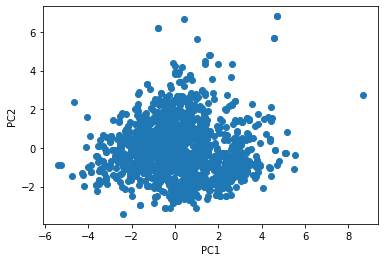

In [58]:
#PCA
pca=PCA(n_components=2)
X_PCA_2= pd.DataFrame(pca.fit_transform(X_standardized), columns=["PC1", "PC2"])

plt.scatter(x=X_PCA_2["PC1"], y=X_PCA_2["PC2"])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [59]:
#Show correlation matrix between PCs and Variables
dataframes_2 = [df, X_PCA_2]
merged_data_2=pd.concat(dataframes_2,axis=1)
corr_2=merged_data_2.corr()
pd.options.display.float_format = '{:,.1f}'.format
corr_2[["PC1", "PC2"]].iloc[0:11]

#PC1: rather acidic wines

,PC1,PC2
fixed acidity,0.9,-0.2
volatile acidity,-0.4,0.4
citric acid,0.8,-0.2
residual sugar,0.3,0.4
chlorides,0.4,0.2
free sulfur dioxide,-0.1,0.7
total sulfur dioxide,0.0,0.8
density,0.7,0.3
pH,-0.8,0.0
sulphates,0.4,-0.1


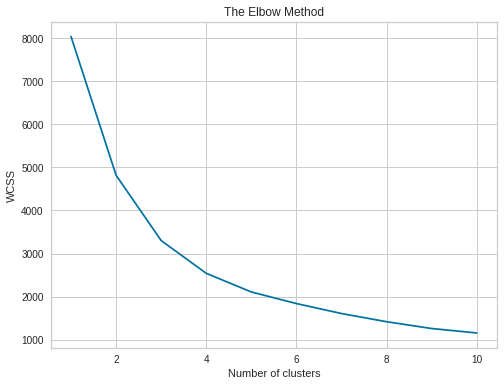

In [67]:
wcss = []  #Within-Cluster Sum of Square
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_PCA_2)
    #inertia = Sum of squared errors
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

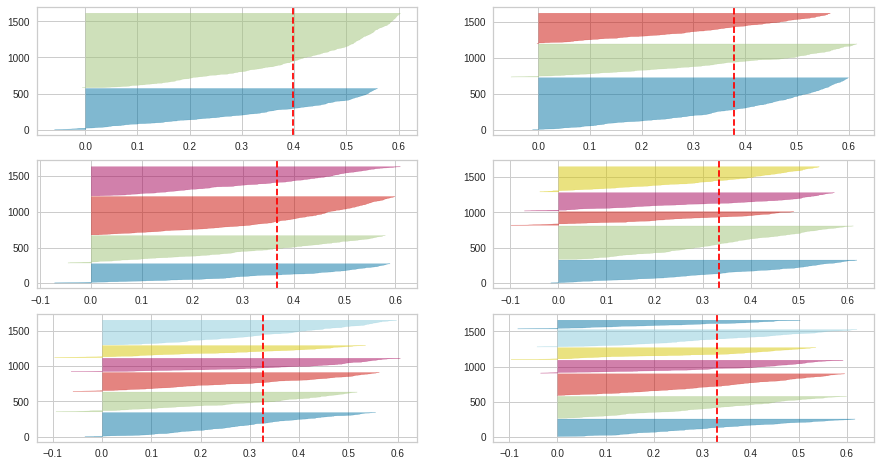

In [68]:
#The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point o is very compact within the cluster to which 
#it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(X_PCA_2, kmeans.labels_, metric='euclidean')
#
# Print the score
#

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_PCA_2)

In [69]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_PCA_2)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_PCA_2, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Score is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Score is 0.398996203174832
For n_clusters=3, The Silhouette Score is 0.3775716912549476
For n_clusters=4, The Silhouette Score is 0.36732978065145827
For n_clusters=5, The Silhouette Score is 0.33491886215164923
For n_clusters=6, The Silhouette Score is 0.32751782708938804
For n_clusters=7, The Silhouette Score is 0.3364318567514512
For n_clusters=8, The Silhouette Score is 0.3321417846924991
For n_clusters=9, The Silhouette Score is 0.3368439387143599
For n_clusters=10, The Silhouette Score is 0.33445383773957427


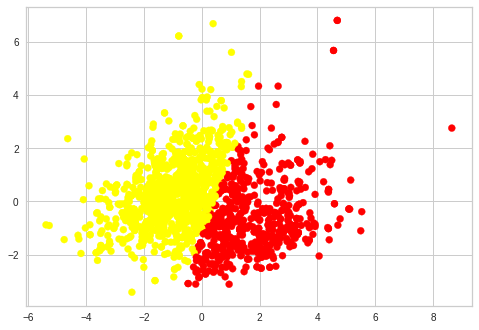

In [71]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_PCA_2)

clusters = kmeans.predict(X_PCA_2)

plt.scatter(x=X_PCA_2["PC1"], y=X_PCA_2["PC2"], c=clusters, cmap='autumn')

In [72]:
df["cluster"]=clusters
df.groupby('cluster').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,10.0,0.4,0.5,2.7,0.1,12.6,36.8,1.0,3.2,0.7,10.6,5.9
1,7.4,0.6,0.2,2.4,0.1,17.7,51.8,1.0,3.4,0.6,10.3,5.5
